## 분류용 선형 모델

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

In [54]:
#Logistic Regression_C=1
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold3 = KFold(n_splits = 3, shuffle=True, random_state = 0)
score =  cross_val_score(logreg, cancer.data, cancer.target, cv=kfold3)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(score.mean()))

#Cross_validation_k=5
kfold5 = KFold(n_splits = 5,  shuffle=True, random_state = 0)
score5 = cross_val_score(logreg, cancer.data, cancer.target, cv=kfold5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

#Cross_validation_LOOCV
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
score_loo = cross_val_score(logreg, cancer.data, cancer.target, cv = loo)
print("LOOCV 교차 검증 분할 횟수:", len(score_loo))
print("LOOCV 평균 정확도:{:.3f}".format(score_loo.mean()))

#Cross_validation_shuffle-splitcross-validation
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, cancer.data, cancer.target, cv=shuffle_split)
print("임의 분할 교차검증 점수:\n{}".format(scores))
print("임의 분할 교차검증 평균점수:\n{}".format(scores.mean()))

훈련 세트 점수 :0.955
테스트 세트 점수 :0.958
교차 검증 점수:[0.96315789 0.93157895 0.95767196]
교차 검증 평균 점수:0.951
5겹 교차 검증 점수:[0.95614035 0.99122807 0.9122807  0.93859649 0.97345133]
5겹 교차 검증 평균 점수:0.954
LOOCV 교차 검증 분할 횟수: 569
LOOCV 평균 정확도:0.951
임의 분할 교차검증 점수:
[0.94736842 0.94385965 0.96842105 0.93684211 0.95087719 0.94736842
 0.94035088 0.92982456 0.95087719 0.94035088]
임의 분할 교차검증 평균점수:
0.9456140350877194


In [61]:
#오차행렬_confusion matrix
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수 :{:.2f}".format(logreg.score(X_test, y_test)))
confusion = confusion_matrix(y_test, pred_logreg)
print("오차행렬:\n{}".format(confusion))

from sklearn.metrics import f1_score
print("로지스틱 회귀 모델의 f1 score:{:.2f}".format(f1_score(y_test, pred_logreg)))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names =["positive", "negative"]))

logreg 점수 :0.94
오차행렬:
[[46  7]
 [ 1 89]]
로지스틱 회귀 모델의 f1 score:0.96
             precision    recall  f1-score   support

   positive       0.98      0.87      0.92        53
   negative       0.93      0.99      0.96        90

avg / total       0.95      0.94      0.94       143



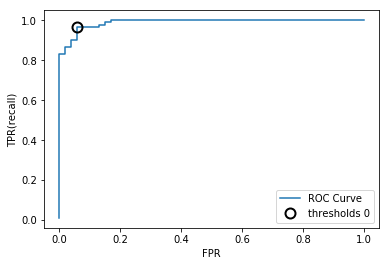

In [112]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "thresholds 0", fillstyle ="none", c ='k', mew =2)
plt.legend(loc=4)

In [113]:
#AUC
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg.decision_function(X_test))
print("로지스틱회귀의 AUC :{:.3f} ".format(logreg_auc))

로지스틱회귀의 AUC :0.989 


In [12]:
#과소적합을 피하기 위해 C를 증가시켜 제약을 풀어준다.
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg100.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg100, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(logreg100, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 점수 :0.972
테스트 세트 점수 :0.965
교차 검증 점수:[0.93684211 0.96842105 0.94708995]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.94782609 0.94782609 0.95575221 0.94690265 0.97345133]
5겹 교차 검증 평균 점수:0.954


In [14]:
#C를 낮춰 제약을 높인다.
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg001.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg001, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(logreg001, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 점수 :0.934
테스트 세트 점수 :0.930
교차 검증 점수:[0.91052632 0.94736842 0.92063492]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.90434783 0.93913043 0.92920354 0.92035398 0.94690265]
5겹 교차 검증 평균 점수:0.928


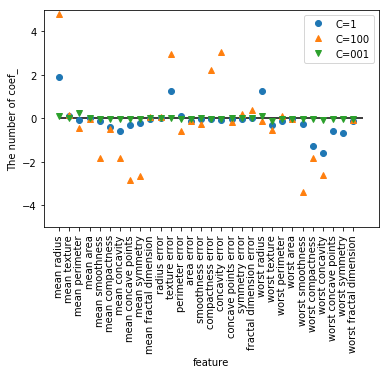

In [12]:
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef_")
plt.legend()

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty = "l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef_")

plt.ylim(-5,5)
plt.legend(loc=3)

"""모델들의 주요 차이는 규제에서 모든 특성을 이용할지, 일부 특성만 사용할지 결정하는 penalty 매개변수이다."""

### 결정 트리

In [70]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.937
교차 검증 점수:[0.88947368 0.94210526 0.86243386]
교차 검증 평균 점수:0.946
5겹 교차 검증 점수:[0.90434783 0.92173913 0.91150442 0.94690265 0.90265487]
5겹 교차 검증 평균 점수:0.917


In [17]:
#트리 성장 제어
tree = DecisionTreeClassifier(max_depth=4, random_state = 0)
tree. fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))
"""트리 깊이를 제한하면 과대적합을 줄인다->훈련 세트의 정확도 낮아지지만, 테스트 세트의 성능은 개선된다. """

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.951
교차 검증 점수:[0.90526316 0.95263158 0.9047619 ]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.92173913 0.88695652 0.9380531  0.92920354 0.90265487]
5겹 교차 검증 평균 점수:0.916


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity = False, filled = True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 144: illegal multibyte sequence

In [24]:
#특성 중요도: 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가함
print("특성 중요도:\n{}".format(tree.feature_importances_))
"""0:전혀 사용되지 않았다, 1:완벽하게 타깃 클래스를 예측했다, 특성 중요도의 전체 합 = 1"""

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [21]:
def plots_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature_importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importance_cancer(tree)

NameError: name 'plt' is not defined

### 랜덤포레스트

In [84]:
#100개의 트리를 사용하는 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도:{:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(forest, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


훈련 세트 정확도:1.000
테스트 세트 정확도:0.972
교차 검증 점수:[0.94210526 0.97368421 0.96296296]
교차 검증 평균 점수:0.946
5겹 교차 검증 점수:[0.93913043 0.94782609 0.99115044 0.98230088 0.97345133]
5겹 교차 검증 평균 점수:0.967


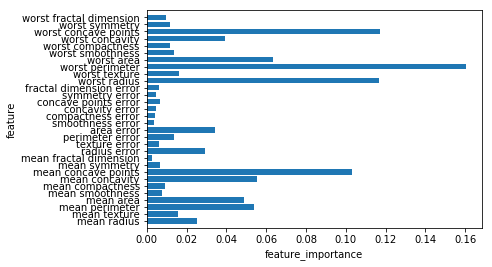

In [29]:
#유방암 데이터로 만든 랜덤 포레스트 모델의 특성 중요도
plot_feature_importance_cancer(forest)

### 그래디언트 부스팅 회귀 트리

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbrt, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.958
교차 검증 점수:[0.94736842 0.96842105 0.95238095]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.93043478 0.93913043 0.97345133 0.98230088 0.98230088]
5겹 교차 검증 평균 점수:0.962


In [24]:
#그래디언트 부스팅_가지치기(최대깊이)
gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbrt, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.972
교차 검증 점수:[0.94736842 0.97894737 0.95767196]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.93913043 0.94782609 0.99115044 0.96460177 0.97345133]
5겹 교차 검증 평균 점수:0.963


In [25]:
#그래디언트 부스팅_가지치기(학습률)
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbrt, cancer.data, cancer.target)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

#Cross_validation_k=5
score5 = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.965
교차 검증 점수:[0.91052632 0.95263158 0.92063492]
교차 검증 평균 점수:0.949
5겹 교차 검증 점수:[0.93913043 0.92173913 0.95575221 0.94690265 0.94690265]
5겹 교차 검증 평균 점수:0.942


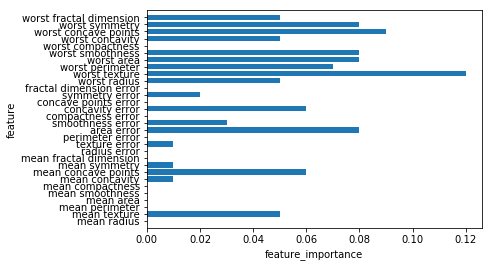

In [36]:
#유방암 데이터로 만든 그래디언트 부스팅 분류기의 특성 중요도
gbrt=GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importance_cancer(gbrt)

### 커널 서포트 벡터 머신(SVM)

In [71]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test, y_test)))
"""SVM은 매개변수 설정과 데이터 스케일에 매우 민감함-> 입력 특성의 범위가 비슷해야함(스케일 중요)"""

훈련 세트 정확도:1.000
테스트 세트 정확도:0.629


'SVM은 매개변수 설정과 데이터 스케일에 매우 민감함-> 입력 특성의 범위가 비슷해야함(스케일 중요)'

Text(0,0.5,'feature_size')

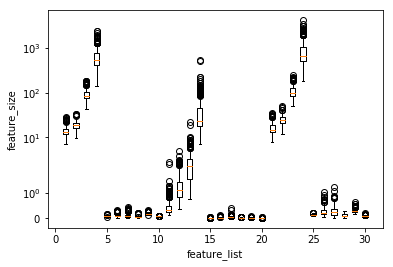

In [41]:
#유방암 데이터셋의 특정 값 범위(y축:log_scale)
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("feature_list")
plt.ylabel("feature_size")

### 신경망(딥러닝)

In [42]:
from sklearn.neural_network import MLPClassifier
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도:0.906
테스트 세트 정확도:0.881


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.965
테스트 세트 정확도:0.951


In [48]:
#반복횟수 증가로 성능 개선
mlp=MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.965
테스트 세트 정확도:0.951


In [50]:
#alpha매개변수를 증가
mlp=MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.965
테스트 세트 정확도:0.944


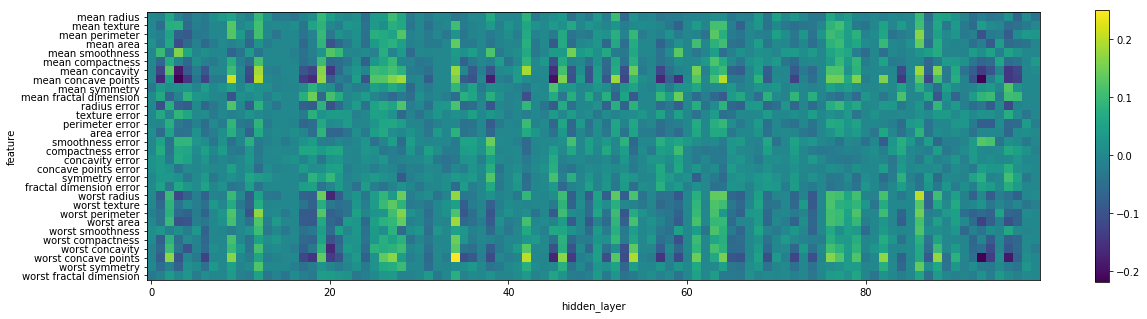

In [51]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation ='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden_layer")
plt.ylabel("feature")
plt.colorbar()

# 3.3 데이터 전처리와 스케일

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

#데이터셋 확인
print(X_train.shape) 
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #MinMaxSacler의 fit 메서드느 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
#데이터 변환_transform:새로운 데이터 표현 만드는 메서드
X_train_scaled = scaler.transform(X_train)
#스테일 조정 후 데이터셋의 속성을 출력
print("변환된 후 크기:{}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n{}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n{}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(X_train_scaled.max(axis=0)))

In [11]:
#테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
#스케일이 조정된 후 테스트 데이터의 속성을 출력
print("변환된 후 크기:{}".format(X_test.shape))
print("스케일 조정 전 특성별 최솟값:\n{}".format(X_test.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(X_test.max(axis=0)))
#테스트 세트에 훈련 세트의 변환을 적용
print("스케일 조정 후 특성별 최솟값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(X_test_scaled.max(axis=0)))

변환된 후 크기:(143, 30)
스케일 조정 전 특성별 최솟값:
[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 특성별 최댓값:
[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
스케일 조정 후 특성별 최솟값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.   

In [16]:
#cancer데이터셋으로 SVC를 학습(MinMaxScaler사용)
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm=SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도:{}".format(svm.score(X_test, y_test)))

테스트 세트 정확도:0.6293706293706294


In [17]:
#0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#조정된 데이터로 SVM학습
svm.fit(X_train_scaled, y_train)
#스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도:{:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도:0.97


In [19]:
#cancer데이터셋으로 SVC를 학습(StandarScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#조정된 데이터로 SVM학습
svm.fit(X_train_scaled, y_train)
#스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도:{:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도:0.96


#PCA를 적용해 유방암 데이터셋 시각화하기

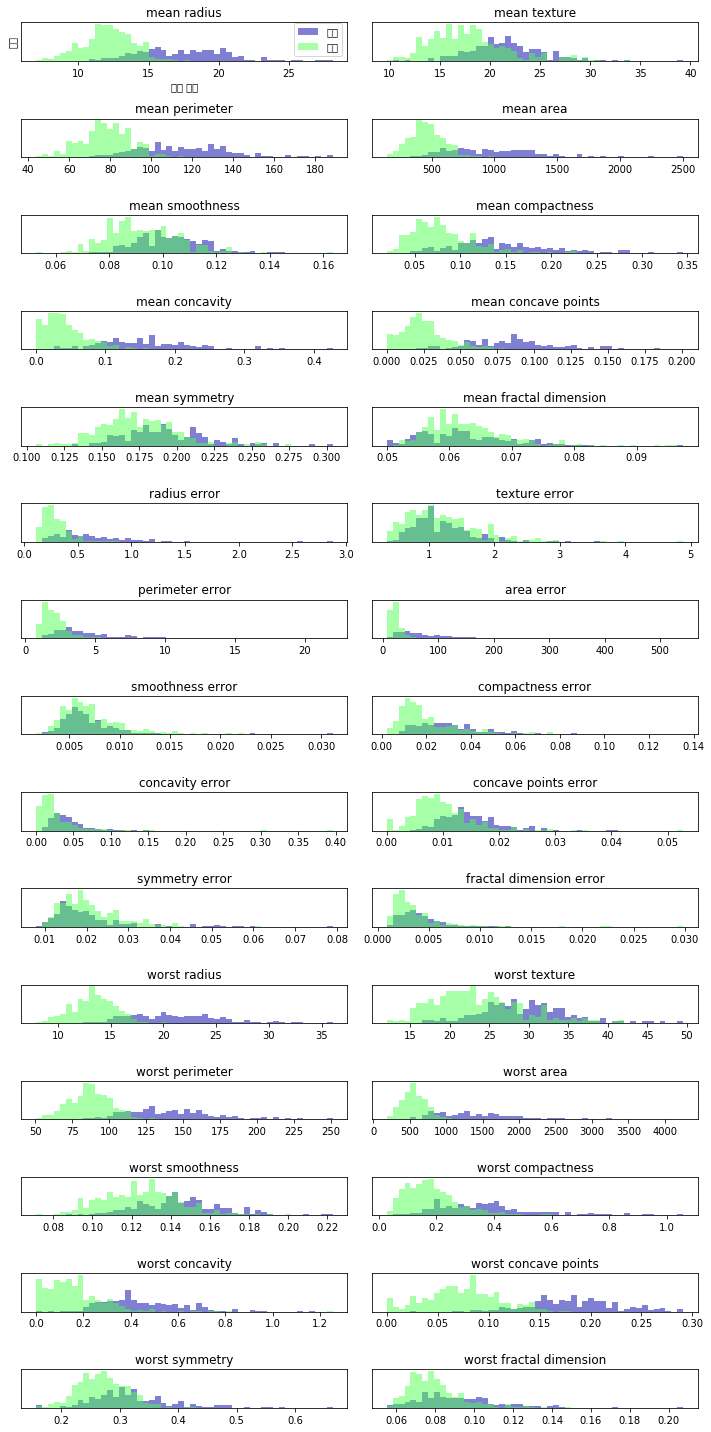

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [26]:
#PCA를 적용하기 전, StandardScaler로 스케일 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [27]:
from sklearn.decomposition import PCA
#데이터의 처음 두 개의 주성분만 유지합니다.
pca = PCA(n_components=2)
#유방암 데이터로 PCA모델 만듬
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
#처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:{}".format(str(X_scaled.shape)))
print("축소된 데이터 형태:{}".format(str(X_pca.shape)))

원본 데이터 형태:(569, 30)
축소된 데이터 형태:(569, 2)


Text(0,0.5,'두번째 주성분')

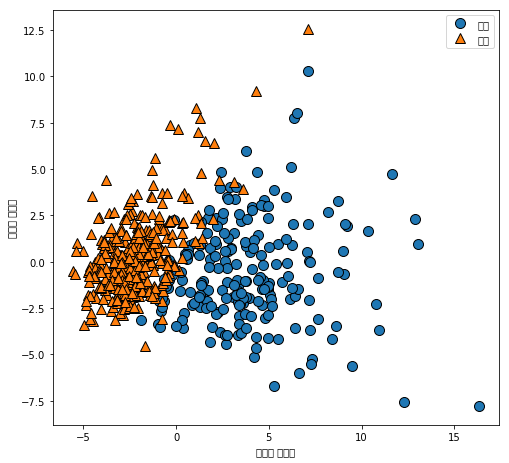

In [30]:
#클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타내기
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["악성","양성"], loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")

In [32]:
print("PCA 주성분 형태:{}".format(pca.components_.shape))

PCA 주성분 형태:(2, 30)


In [34]:
print("PCA 주성분 :{}".format(pca.components_))

PCA 주성분 :[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'주성분')

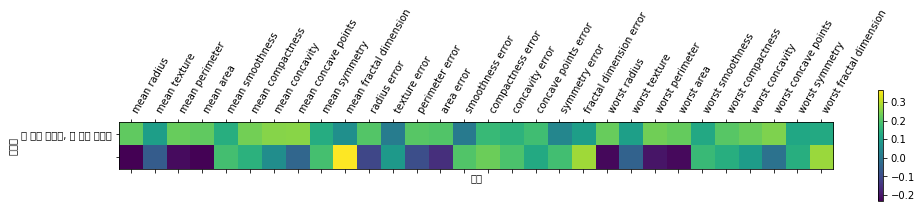

In [37]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분, 두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

교차검증(cross_validation)
일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법
데이터를 여러 번 반복해서 나누고 여러 모델을 학습
k-겹 교차 검증
폴드:데이터를 비슷한 크기로 나눈 '부분집합'

In [1]:
#Cross_validation_k=3
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold3 = KFold(n_splits = 3, shuffle=True, random_state = 0)
score =  cross_val_score(logreg, cancer.data, cancer.target, cv=kfold3)
print("교차 검증 점수:{}".format(score))
print("교차 검증 평균 점수:{:.3f}".format(score.mean()))

#Cross_validation_k=5
kfold5 = KFold(n_splits = 5,  shuffle=True, random_state = 0)
score5 = cross_val_score(logreg, cancer.data, cancer.target, cv=kfold5)
print("5겹 교차 검증 점수:{}".format(score5))
print("5겹 교차 검증 평균 점수:{:.3f}".format(score5.mean()))

#Cross_validation_LOOCV
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
score_loo = cross_val_score(logreg, cancer.data, cancer.target, cv = loo)
print("LOOCV 교차 검증 분할 횟수:", len(score_loo))
print("LOOCV 평균 정확도:{:.3f}".format(score_loo.mean()))

#Cross_validation_shuffle-splitcross-validation
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, cancer.data, cancer.target, cv=shuffle_split)
print("임의 분할 교차검증 점수:\n{}".format(scores))
print("임의 분할 교차검증 평균점수:\n{}".format(scores.mean()))

교차 검증 점수:[0.93684211 0.96842105 0.94179894]


그리드 서치(Grid Search)
관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것

In [19]:
#for문 사용
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
print("훈련 세트의 크기:{} 테스트 세트의 크기:{}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수:{}".format(best_parameters))

훈련 세트의 크기:426 테스트 세트의 크기:143
최고 점수 : 0.93
최적 매개변수:{'C': 1, 'gamma': 0.001}


In [27]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print("훈련 세트의 크기:{} 검증 세트의 크기:{} 테스트 세트의 크기:{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수:{}".format(best_parameters))

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameters)
print("최적 매개변수에서 테스트 세트 점수:{:.2f}".format(test_score))

훈련 세트의 크기:319 검증 세트의 크기:107 테스트 세트의 크기:143

최고 점수 : 0.93
최적 매개변수:{'C': 1, 'gamma': 0.001}
검증 세트에서 최고 점수:0.93
최적 매개변수: {'C': 1, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수:0.93


In [30]:
#교차검증을 사용한 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score>best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:",best_parameters)
print("최적 매개변수에서 테스트 세트 점수:{:.2f}".format(test_score))

검증 세트에서 최고 점수:0.93
최적 매개변수: {'C': 1, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수:0.93


In [32]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드:\n{}'.format(param_grid))

매개변수 그리드:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=50)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
grid_search.fit(X_train, y_train)
print("테스트 세트 점수:{:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수:{}".format(grid_search.best_params_))
print("최상 교차 검증 점수:{:.2f}".format(grid_search.best_score_))

테스트 세트 점수:0.93
최적 매개변수:{'C': 1, 'gamma': 0.001}
최상 교차 검증 점수:0.92


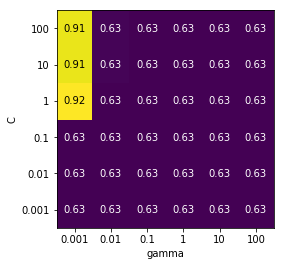

In [38]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

#적절하지 않은 매개변수 그리드의 히트맵
fig, axes = plt.subplots(1, 3, figsize = (13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                   'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    score_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = "viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

#비대칭 매개변수 그리드 탐색
param_grid = [{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("최적 매개변수:{}".format(grid_search.best_params_))
print("최고 교차 검증 점수:{}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)

#중첩 교차 검증
param_grid = [{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), cancer.data, cancer.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

In [100]:
#오차행렬_confusion matrix
from sklearn.metrics import confusion_matrix
tree = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(X_train, y_train)
svc = SVC(gamma=.5).fit(X_train, y_train)
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

pred_tree = tree.predict(X_test)
pred_svc = svc.predict(X_test)
pred_logreg = logreg.predict(X_test)

print("tree 점수 :{:.2f}".format(tree.score(X_test, y_test)))
print("svc 점수 :{:.2f}".format(svc.score(X_test, y_test)))
print("logreg 점수 :{:.2f}".format(logreg.score(X_test, y_test)))

tree 점수 :0.95
svc 점수 :0.63
logreg 점수 :0.94


In [87]:
confusion = confusion_matrix(y_test, pred_tree)
print("오차행렬:\n{}".format(confusion))

오차행렬:
[[50  3]
 [ 5 85]]


In [88]:
confusion = confusion_matrix(y_test, pred_svc)
print("오차행렬:\n{}".format(confusion))

오차행렬:
[[ 0 53]
 [ 0 90]]


In [89]:
confusion = confusion_matrix(y_test, pred_logreg)
print("오차행렬:\n{}".format(confusion))

오차행렬:
[[50  3]
 [ 5 85]]


In [90]:
from sklearn.metrics import f1_score
print("결정트리 모델의 f1 score:{:.2f}".format(f1_score(y_test, pred_tree)))
print("서포터벡터머신 모델의 f1 score:{:.2f}".format(f1_score(y_test, pred_svc)))
print("로지스틱 회귀 모델의 f1 score:{:.2f}".format(f1_score(y_test, pred_logreg)))

결정트리 모델의 f1 score:0.96
서포터벡터머신 모델의 f1 score:0.77
로지스틱 회귀 모델의 f1 score:0.96


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names =["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.91      0.94      0.93        53
   negative       0.97      0.94      0.96        90

avg / total       0.94      0.94      0.94       143



In [92]:
print(classification_report(y_test, pred_svc, target_names =["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.00      0.00      0.00        53
   negative       0.63      1.00      0.77        90

avg / total       0.40      0.63      0.49       143



C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
print(classification_report(y_test, pred_logreg, target_names =["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.91      0.94      0.93        53
   negative       0.97      0.94      0.96        90

avg / total       0.94      0.94      0.94       143



정밀도-재현율 곡선 : 새로운 모델을 만들 때 운영 포인트를 명확히 알아보기 위해서 모든 임계값을 조사하거나 정밀도 재현율의 모든 장단점을 살펴보기 위한 것.

In [67]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, logreg.decision_function(X_test))

IndexError: index 6 is out of bounds for axis 0 with size 3

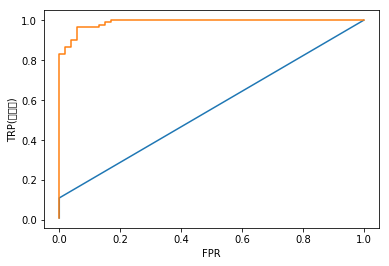

In [106]:
#ROC곡선
from sklearn.metrics import roc_curve

fpr_sv, tpr_sv, thresholds_sv = roc_curve(y_test, svc.decision_function(X_test))
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, logreg.decision_function(X_test))


plt.plot(fpr_sv, tpr_sv, label = "SVC의 ROC Curve")
plt.plot(fpr_lg, tpr_lg, label = "Logreg의 ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TRP(재현율)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr_sv[close_zero], tpr_sv[close_zero], '^', markersize = 10, label = "svc 임계값 0", fillstyle = "none", c='k', mew=2)
plt.plot(fpr_lg[close_zero], tpr_lg[close_zero], 'v', markersize = 10, label = "lg 임계값 0", fillstyle = "none", c='k', mew=2)
plt.legend(loc=4)

pipleline = 여러 처리 단계를 하나의 scikit-learn추정기 형태로 묶어주는 파이썬 클래스
fit, predict, score메서드를 제공
분류기 같은 지도 학습 모델과 데이터 스케일 조정 같은 전처리 단계를 연결할 때 사용.

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수 : 0.95


In [121]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 정확도:{:.2f}".format(grid.best_score_))
print("테스트 세트 점수:{:.2f}".format(grid.score(X_test, y_test)))
print("최적의 매개변수:{}".format(grid.best_params_))

최상의 교차 검증 정확도:0.98
테스트 세트 점수:0.97
최적의 매개변수:{'svm__C': 1, 'svm__gamma': 1}
